# Presa-depredador Lodka-Volterra

##  1. Obejtivos

### 1.1 Objetivo general

* Resolver las ecuaciones diferenciales que representan el modelo presa-depredador de Lotka-Volterra por medio de una solución numérica utilizando odeint.


### 1.2 Obejtivos específicos

- Construir un modelo que modele el comportamiento periódico de este sistema.

- Interpretar resultados de las graficas de las variables contra tiempo y del plano fase.

- Hacer modificaciones de las condiciones iniciales para ver como se comporta el modelo con distintos escenarios.

## 2. Modelo que representa el problema

En este proyecto se tratará un ejemplo clásico de un modelo presa-depredador representando a la población de conejos y linces en un bosque al norte de Canadá. Para este ejemplo los datos que aquí se presentan se registraron por la compañía Hudson Bay entre los años de 1800-1900, y se asume que estas capturas son representativas del tamaño de las poblaciones. En la Tabla 1 se reportan la cantidad de población de linces y conejos durante el periodo de tiempo ya mencionado.

<img style="float: center; margin: 0px 0px 15px 15px;" src="Tabla.png" width="400px" height="100px" />

Para la representación del problema se tienen las siguientes ecuaciones diferenciales:

\begin{align}
\frac{dx_1}{dt} &= ax_1-bx_1x_2\\
\frac{dx_2}{dt} &= -cx_2+dx_1x_2,
\end{align}

Donde:
* $x_1(t)$: Población de conejos en el tiempo t.
* $x_2(t)$: Población de linces en el tiempo t.

Los parámetros $a,b,c$ y $d$ se obtuvieron de la información de la tabla de la siguiente manera:

*Para encontrar a*
1. Se asumió que los conejos crecen de manera exponenecial cuando el número de depredadores es bajo, este se puede observar en el año 1910 a 1911
2. Se crea la ecuación $población_f=población_ie^a$
3. Se remplazaron valores y se obtuvo $a=0.397$

*Para encontrar c*
1. Se asumió que cuando disminuye la cantidad de conejor el descenso de linces es exponencial, lo cual sucede en el año 1905.
2. Se crea la ecuación $población_f=población_ie^{-b}$
3. Se remplazaron valores y se obtuvo $c=0.786$

*Para encontrar b y d*
1. Se ultilizaron las siguientes ecuaciones:
<img style="float: center; margin: 0px 0px 15px 15px;" src="valormedio.png" width="300px" height="100px" />

donde para este problema $a_1=a$ , $b_1=c$, $a_2=b$ , $b_2=d$

2. Se remplazaron los valores obtenidos previamente y se obtuvieron los nuevos valores $b=0.018$ y $d=0.023$

Finalmente con todos los parámetros obtenidos y con las condiciones iniciales  $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [30 \quad 4]^T$. y un vector de tiempo de 0 a 30 años, se puede resolver el problema.

## 3. Solución del problema y visualización del problema


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

In [2]:
def LoVo(x,t):
    x1=x[0]
    x2=x[1]
    a=0.4
    b=0.018
    c=0.8
    d=0.023
    dx1 = a*x1-b*x1*x2
    dx2 = -c*x2+d*x1*x2
    return np.array([dx1, dx2])

In [19]:
x0_1=np.array([30,4])
 
t= np.linspace(0,30,1000)

In [20]:
xx=odeint(LoVo, x0_1, t)
x1=xx[:,0]
x2=xx[:,1]

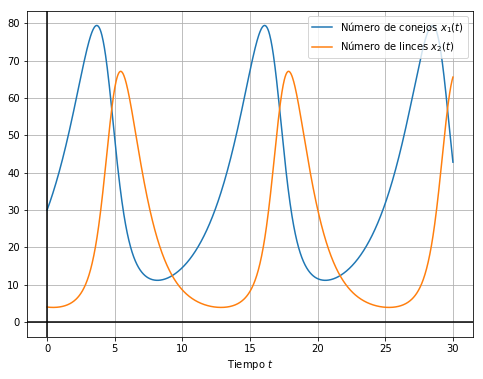

In [21]:
plt.figure(figsize=(8,6))
plt.plot(t, x1, label='Número de conejos $x_1(t)$')
plt.plot(t, x2, label='Número de linces $x_2(t)$')
plt.xlabel('Tiempo $t$')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='best')

plt.grid()
plt.show()

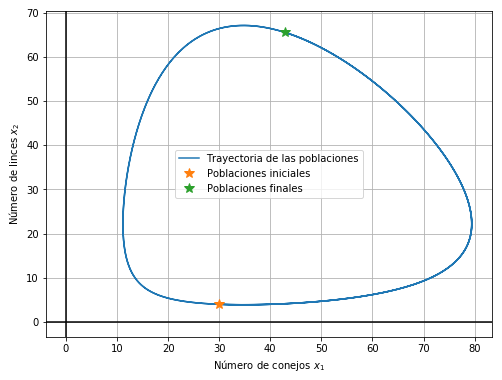

In [22]:
plt.figure(figsize=(8,6))
plt.plot(x1, x2, label='Trayectoria de las poblaciones')
plt.plot(x1[0], x2[0], '*', ms=10, label = 'Poblaciones iniciales')
plt.plot(x1[-1], x2[-1], '*', ms=10, label = 'Poblaciones finales')
plt.xlabel('Número de conejos $x_1$')
plt.ylabel('Número de linces $x_2$')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc = 'best')
plt.grid()
plt.show()

La primer gráfica indica un modelo oscilatorio y periódico que se repite cada 12 años, aproximadamente. El número de conejos aumenta siempre al igual que el número de linces, hasta cierta cantidad para luego comenzar a descender. Sin embargo, la población de linces nunca es mayor a la población de conejos en el bosque y es que cuando la población de conejos empieza disminuir de manera análoga la población de linces por el efecto que la primera tiene sobre la otra. Cuando la población de conejos es mínima, la población de linces se reduce aún más. Los linces llegan a un mínimo pero la población de conejos ya se ha acrecentado lo bastante como para que la población de linces vuelva a incrementarse así hasta que la población de conejos presente un máximo y se origine una reducción en su población por el contrario la población de linces todavía sigue creciendo hasta ocupar un máximo de su especie y con la reducción de conejos también se vea afectada su especie y vuelva a descender y de esta manera se repita el ciclo.

**Cambiando las condiciones iniciales** 

In [7]:
x0_2=np.array([20,20])
 
t= np.linspace(0,30,1000)
 

In [8]:
xx=odeint(LoVo, x0_2, t)
x1=xx[:,0]
x2=xx[:,1]

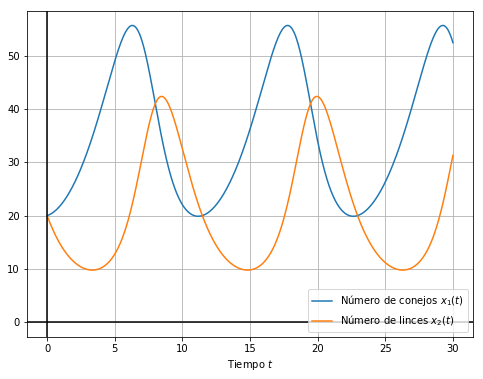

In [9]:
plt.figure(figsize=(8,6))
plt.plot(t, x1, label='Número de conejos $x_1(t)$')
plt.plot(t, x2, label='Número de linces $x_2(t)$')
plt.xlabel('Tiempo $t$')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='best')
plt.grid()
plt.show()

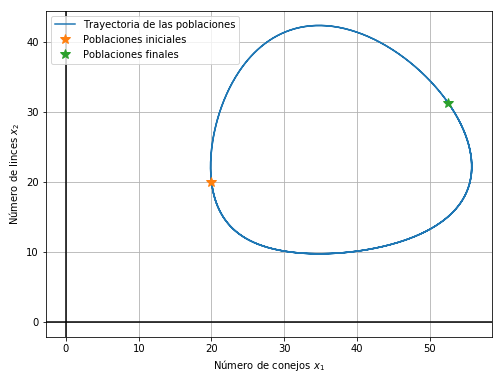

In [10]:
plt.figure(figsize=(8,6))
plt.plot(x1, x2, label='Trayectoria de las poblaciones')
plt.plot(x1[0], x2[0], '*', ms=10, label = 'Poblaciones iniciales')
plt.plot(x1[-1], x2[-1], '*', ms=10, label = 'Poblaciones finales')
plt.xlabel('Número de conejos $x_1$')
plt.ylabel('Número de linces $x_2$')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc = 'best')
plt.grid()
plt.show()

Al cambiar las condiciones iniciales para empezar con la misma cantidad de linces y de conejos, podemos observar de las gráfica 1 que se comporta de manera muy similar a la gráfica del caso anterior, ya que también hay un ciclo cada 12 años y cuando ambas especies llegan al punto máximo de población, el número empieza a decrecer.

Cambiando condiciones iniciales

In [37]:
x0_3=np.array([500,50])
 
t= np.linspace(0,30,1000)
 

In [38]:
xx=odeint(LoVo, x0_3, t)
x1=xx[:,0]
x2=xx[:,1]

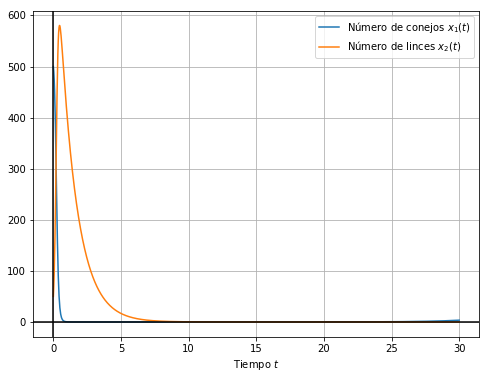

In [39]:
plt.figure(figsize=(8,6))
plt.plot(t, x1, label='Número de conejos $x_1(t)$')
plt.plot(t, x2, label='Número de linces $x_2(t)$')
plt.xlabel('Tiempo $t$')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='best')
plt.grid()
plt.show()

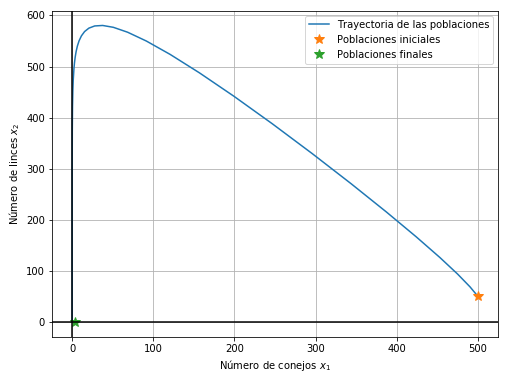

In [40]:
plt.figure(figsize=(8,6))
plt.plot(x1, x2, label='Trayectoria de las poblaciones')
plt.plot(x1[0], x2[0], '*', ms=10, label = 'Poblaciones iniciales')
plt.plot(x1[-1], x2[-1], '*', ms=10, label = 'Poblaciones finales')
plt.xlabel('Número de conejos $x_1$')
plt.ylabel('Número de linces $x_2$')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc = 'best')
plt.grid()
plt.show()

Para esta tercera situación donde el número de conejos es 10 veces más grande que la cantidad de linces, de la gráfica se oberva que empiezan a disminuir drásticamente el número de conejos y por otro lado, la cantidad de linces empieza a aumentar considerablemente, esto a que hay suficiente comida para que los linces se reproduzcan fáclmente, sin embargo, al disminuir los conejos, los linces llegan a un punto máximo y por quedarse sin alimento estos se extiguen. 

Cambiando condiciones iniciales

In [60]:
x0_4=np.array([50,500])
 
t= np.linspace(0,30,1000)
 

In [61]:
xx=odeint(LoVo, x0_4, t)
x1=xx[:,0]
x2=xx[:,1]

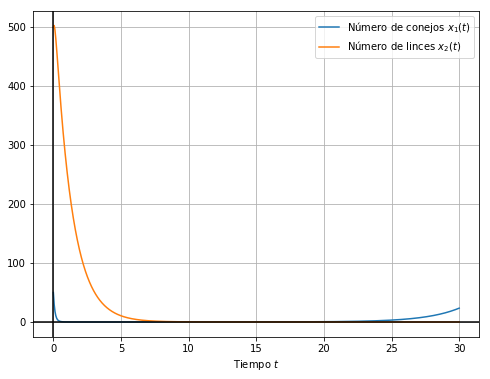

In [62]:
plt.figure(figsize=(8,6))
plt.plot(t, x1, label='Número de conejos $x_1(t)$')
plt.plot(t, x2, label='Número de linces $x_2(t)$')
plt.xlabel('Tiempo $t$')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='best')
plt.grid()
plt.show()

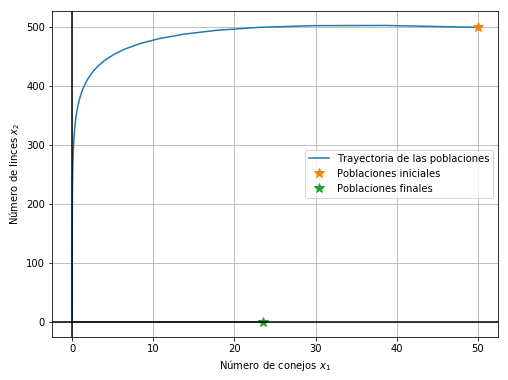

In [63]:
plt.figure(figsize=(8,6))
plt.plot(x1, x2, label='Trayectoria de las poblaciones')
plt.plot(x1[0], x2[0], '*', ms=10, label = 'Poblaciones iniciales')
plt.plot(x1[-1], x2[-1], '*', ms=10, label = 'Poblaciones finales')
plt.xlabel('Número de conejos $x_1$')
plt.ylabel('Número de linces $x_2$')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc = 'best')
plt.grid()
plt.show()

En esta última situación modelamos un escenario donde hay 10 veces más linces que conejos. De la gráfica se puede observar que al no haber alimento para la gran cantidad de linces, el número de ellos empieza a caer rápidamente hasta llegar a la extinción. La cantidad de conejos también disminuye en un inicio, que hasta parece que se extinguen, pero cuando ya no hay más linces, el número de conejos empieza a crecer como se ve después del año 25.

## 5. Conclusiones

En conclusión las ecuaciones diferenciales son muy útiles no solo en problemas matemáticos sino para modelar distintas situaciones de la vida cotidiana, en este caso presa-depredador. Gracias a la función Odeint pudimos resolver las ecuaciones establecidas para este modelo y cambiar las condiciones iniciales para ver los distintos escenarios de este y así poder hacer un análisis completo de su comportamiento. Por lo que todos los objetivos establecidos fueron cumplidos. 

## 6. Referencias

* Wicks, A.. (1998). Práctica 5. Modelo Lotka-Volterra. mayo 10, 2019, de Universidad de Jaén Sitio web: http://ucua.ujaen.es/jnavas/web_modelos/labiologia/practica5.pdf
